In [219]:
# import bike share data
# import libraries

df = pd.read_csv("/Users/craighammerstein/Downloads/202109-divvy-tripdata.csv")

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext nb_black

<IPython.core.display.Javascript object>

In [220]:
# quick look at dataset

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,NaN,NaN,NaN,NaN,41.89,-87.68,41.89,-87.67,casual
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,NaN,NaN,NaN,NaN,41.94,-87.64,41.98,-87.67,casual
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,NaN,NaN,NaN,NaN,41.81,-87.72,41.80,-87.72,casual
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,NaN,NaN,NaN,NaN,41.80,-87.72,41.81,-87.72,casual
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,NaN,NaN,NaN,NaN,41.88,-87.74,41.88,-87.71,casual


<IPython.core.display.Javascript object>

In [221]:
# Checking for any null values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{} - {}%".format(col, pct_missing))

ride_id - 0.0%
rideable_type - 0.0%
started_at - 0.0%
ended_at - 0.0%
start_station_name - 0.12314139975428058%
start_station_id - 0.12313875476593837%
end_station_name - 0.13127209391824607%
end_station_id - 0.13127209391824607%
start_lat - 0.0%
start_lng - 0.0%
end_lat - 0.0007868840318086298%
end_lng - 0.0007868840318086298%
member_casual - 0.0%


<IPython.core.display.Javascript object>

In [222]:
# Checking data types for possible errors during calculations

df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

<IPython.core.display.Javascript object>

In [223]:
#Converting the date objects to datetime64[ns]

df['started_at']=pd.to_datetime(df['started_at'])
df['ended_at']=pd.to_datetime(df['ended_at'])


<IPython.core.display.Javascript object>

In [224]:
# New column total time cycled

df["total_time"] = df["ended_at"] - df["started_at"]

<IPython.core.display.Javascript object>

In [225]:
# check to see that datatype was changed

df.dtypes

ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
total_time            timedelta64[ns]
dtype: object

<IPython.core.display.Javascript object>

In [226]:
# what are the longest rides?

df["total_time"].sort_values(ascending=False)

607878    22 days 19:38:32
140266    22 days 14:36:30
546234    18 days 02:22:11
248386    14 days 18:09:35
362433    12 days 08:16:58
                ...       
557729   -1 days +23:55:38
409945   -1 days +23:55:33
709635   -1 days +23:55:31
139417   -1 days +23:53:34
388992   -1 days +23:52:57
Name: total_time, Length: 756147, dtype: timedelta64[ns]

<IPython.core.display.Javascript object>

In [227]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,total_time
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,NaN,NaN,NaN,NaN,41.89,-87.68,41.89,-87.67,casual,0 days 00:02:44
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,NaN,NaN,NaN,NaN,41.94,-87.64,41.98,-87.67,casual,0 days 00:15:14
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,NaN,NaN,NaN,NaN,41.81,-87.72,41.80,-87.72,casual,0 days 00:03:41
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,NaN,NaN,NaN,NaN,41.80,-87.72,41.81,-87.72,casual,0 days 00:08:49
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,NaN,NaN,NaN,NaN,41.88,-87.74,41.88,-87.71,casual,0 days 00:10:32


<IPython.core.display.Javascript object>

In [228]:
df['total_time']=df['total_time'].astype('int64')

df['total_time']= df.total_time/(6*10**10)



/var/folders/9t/8nn476ts3_3dp4959smx174r0000gn/T/ipykernel_6558/205243718.py:1: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['total_time']=df['total_time'].astype('int64')


<IPython.core.display.Javascript object>

In [229]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,total_time
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,NaN,NaN,NaN,NaN,41.89,-87.68,41.89,-87.67,casual,2.733333
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,NaN,NaN,NaN,NaN,41.94,-87.64,41.98,-87.67,casual,15.233333
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,NaN,NaN,NaN,NaN,41.81,-87.72,41.80,-87.72,casual,3.683333
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,NaN,NaN,NaN,NaN,41.80,-87.72,41.81,-87.72,casual,8.816667
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,NaN,NaN,NaN,NaN,41.88,-87.74,41.88,-87.71,casual,10.533333


<IPython.core.display.Javascript object>

Text(0.5, 0.98, 'Membership and bike type vs. Time ridden')

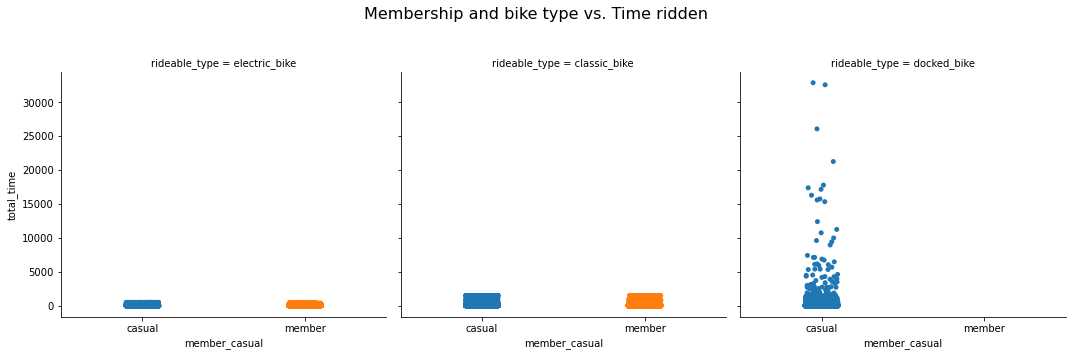

<IPython.core.display.Javascript object>

In [240]:
#plot casual vs. member and types of bikes

g=sns.catplot(x='member_casual', y='total_time', data=df, col='rideable_type')

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Membership and bike type vs. Time ridden', fontsize=16)


In [231]:
# see exactly how members vs. casual compare

df["member_casual"].value_counts()

member    392257
casual    363890
Name: member_casual, dtype: int64

<IPython.core.display.Javascript object>